In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
import numpy as np

In [2]:
import tools

In [3]:
data = pd.read_json("data/flink/pr-flat_20220602-13h35m41s_apache_flink_master_prs-brief.txt", lines=True)

In [4]:
n = data.shape[0]
max_pr = data['number'].max()

In [5]:
tools.initialize_datetime(data)

In [6]:
data = data.set_index('createdAt')
data['createdAt'] = data.index

In [7]:
data['_count'] = 1
data['totalCount'] = data['_count'].cumsum()

In [8]:
data.head()

,title,state,number,mergedAt,closedAt,labels,authorLogin,firstCommentCreatedAt,firstCommentPublishedAt,firstCommentAuthorLogin,firstReviewThreadCreatedAt,firstReviewThreadPublishedAt,firstReviewThreadAuthorLogin,firstReviewCreatedAt,firstReviewPublishedAt,firstReviewAuthorLogin,createdAt,_count,totalCount
createdAt,,,,,,,,,,,,,,,,,,,
2014-06-10 16:51:08+00:00,Fix for FLINK-708 and FLINK-887,CLOSED,1,NaT,2014-06-10 19:42:14+00:00,[component=Deployment/YARN],rmetzger,2014-06-10 16:51:46+00:00,2014-06-10 16:51:46+00:00,rmetzger,NaT,NaT,None,NaT,NaT,None,2014-06-10 16:51:08+00:00,1,1
2014-06-10 19:03:03+00:00,ForwardFields Optimizer integration,CLOSED,2,NaT,2014-07-29 13:47:17+00:00,[],skunert,2014-06-23 12:04:17+00:00,2014-06-23 12:04:17+00:00,skunert,2014-06-10 19:15:40+00:00,2014-06-10 19:15:40+00:00,rmetzger,NaT,NaT,None,2014-06-10 19:03:03+00:00,1,2
2014-06-10 19:22:44+00:00,"DistCache: executable flag, dir support",CLOSED,3,NaT,2014-06-13 15:56:08+00:00,[],zentol,2014-06-13 10:52:21+00:00,2014-06-13 10:52:21+00:00,StephanEwen,2014-06-10 20:28:38+00:00,2014-06-10 20:28:38+00:00,rmetzger,NaT,NaT,None,2014-06-10 19:22:44+00:00,1,3
2014-06-10 19:29:20+00:00,"Serialized String comparison, Unicode support",CLOSED,4,NaT,2015-08-27 12:05:32+00:00,[],zentol,2014-06-12 08:16:26+00:00,2014-06-12 08:16:26+00:00,zentol,NaT,NaT,None,NaT,NaT,None,2014-06-10 19:29:20+00:00,1,4
2014-06-10 22:31:31+00:00,[FLINK-917] Rename netty IO thread count param...,CLOSED,5,NaT,2014-06-17 22:19:18+00:00,[component=Runtime/Network],uce,2014-06-12 13:41:42+00:00,2014-06-12 13:41:42+00:00,StephanEwen,NaT,NaT,None,NaT,NaT,None,2014-06-10 22:31:31+00:00,1,5


## PR labels

In [9]:
title_includes_id = data['title'].str.startswith('[FLINK-')

In [10]:
title_contains_hotfix = data['title'].str.contains('hotfix') 

In [11]:
perc_title_includes_id = data.loc[title_includes_id].shape[0]/n * 100

In [12]:
perc_title_is_hotfix = data.loc[title_contains_hotfix & ~title_includes_id].shape[0]/n * 100

In [13]:
print(f"Title includes FLINK id: {perc_title_includes_id: 6.2f} %")

Title includes FLINK id:  85.54 %


In [14]:
print(f"Title includes hotfix: {perc_title_is_hotfix: 6.2f} %")

Title includes hotfix:   6.49 %


## Open PRs

In [15]:
open_prs = data.loc[data['state'] == 'OPEN', '_count'].count()
print(f"{open_prs} PRs are open.")

836 PRs are open.


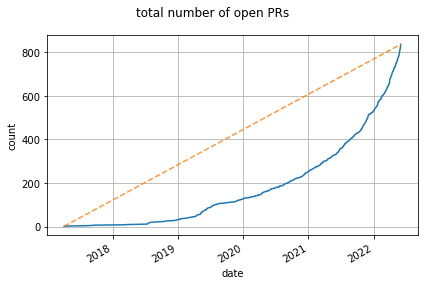

In [16]:
def plot_line(ser: pd.Series, ax):
    pd.Series([ser.min(), ser.max()], index=[ser.index.min(), ser.index.max()]).plot(ax=ax, ls="--", alpha=0.8)

f, ax = plt.subplots()
total_open_prs_over_time = data.loc[data['state'] == 'OPEN', '_count'].cumsum()
total_open_prs_over_time.plot(ax=ax)
plot_line(total_open_prs_over_time, ax)
f.suptitle("total number of open PRs")
ax.set(xlabel='date', ylabel='count')
ax.grid()
tools.savefig(f, 'prs_total_number_of_open_prs')

In the figure below, we can see that the number of open PRs growed continuously over the past years, but is exploding since the beginning of 2021. Each of these reflect a piece of work by a potential contributor.

The number of open PRs has doubled between 2020 and 2021 and again between 2021 and 2022.

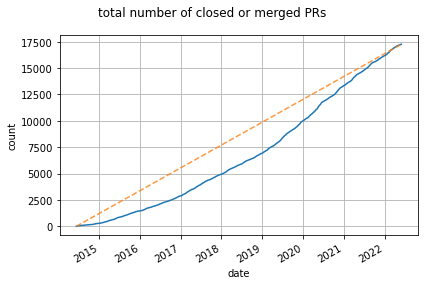

In [17]:
f, ax = plt.subplots()
total_closed_prs_over_time = data.loc[data['state'] != 'OPEN', '_count'].cumsum()
total_closed_prs_over_time.plot(ax=ax)
plot_line(total_closed_prs_over_time, ax)
f.suptitle("total number of closed or merged PRs")
ax.set(xlabel='date', ylabel='count')
ax.grid()
tools.savefig(f, 'prs_total_number_of_closed_merged_prs')

The number of open PRs rises exponentially, while the number of closed PRs rises almost linearly.

In [18]:
from datetime import datetime, timedelta, timezone

now = datetime.now(tz=timezone.utc)
open_prs_age = now - data.loc[data['state'] == 'OPEN', 'createdAt']
open_prs_age = open_prs_age.sort_values().reset_index(drop=True)

In [19]:
open_prs_age_in_days = open_prs_age.dt.days

In [20]:
open_one_week = open_prs_age_in_days.loc[open_prs_age_in_days > 7].count()/open_prs_age_in_days.size * 100
open_one_month = open_prs_age_in_days.loc[open_prs_age_in_days > 30].count()/open_prs_age_in_days.size * 100
open_quarter_year = open_prs_age_in_days.loc[open_prs_age_in_days > 365/4].count()/open_prs_age_in_days.size * 100
open_half_year = open_prs_age_in_days.loc[open_prs_age_in_days > 365/2].count()/open_prs_age_in_days.size * 100
open_one_year = open_prs_age_in_days.loc[open_prs_age_in_days > 365].count()/open_prs_age_in_days.size * 100

In [21]:
print('From the open PRs:')
print(f'{open_one_week: 6.2f} % are open more than one week')
print(f'{open_one_month: 6.2f} % are open more than one month')
print(f'{open_quarter_year: 6.2f} % are open more than three months')
print(f'{open_half_year: 6.2f} % are open more than six months')
print(f'{open_one_year: 6.2f} % are open more than one year')

From the open PRs:
 95.22 % are open more than one week
 88.16 % are open more than one month
 73.09 % are open more than three months
 60.65 % are open more than six months
 39.47 % are open more than one year


In [22]:
print(f"The median age of an open PR is {open_prs_age.median()}")

The median age of an open PR is 260 days 17:06:14.319857


In [23]:
not_open_prs = data.loc[data['state'] != 'OPEN']
not_open_prs_age = pd.to_datetime(not_open_prs['closedAt']) - not_open_prs['createdAt']
print(f"The median / mean age of closed or merged PR is {not_open_prs_age.median()} / {not_open_prs_age.mean()}")

The median / mean age of closed or merged PR is 4 days 02:05:06 / 35 days 22:22:37.619878295


Are PRs that are not addressed in a given time frame never addressed?

### Closed PRs per week

In [24]:
closed_ser = data['closedAt'].dropna().copy().to_frame()

In [25]:
closed_ser['_count'] = 1
closed_ser['closedAt'] = pd.to_datetime(closed_ser['closedAt'])

In [26]:
closed_ser = closed_ser.set_index('closedAt')

/opt/homebrew/Caskroom/miniconda/base/envs/analysis/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1057d47c0> has a label of '_count' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


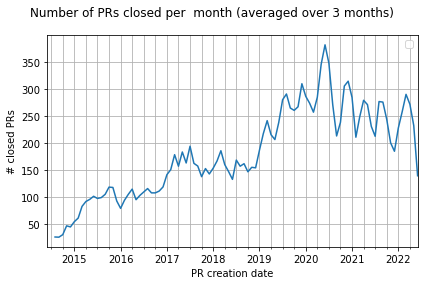

In [27]:
f, ax = plt.subplots()
closed_ser.resample('M').sum().rolling(3).mean().plot(ax=ax)
f.suptitle('Number of PRs closed per  month (averaged over 3 months)')
ax.grid(which='both')
ax.set(xlabel='PR creation date', ylabel='# closed PRs')
tools.savefig(f, 'prs_number_of_prs_closed_per_month')

### PR life time 

In [28]:
closed_prs = data.query('state == "CLOSED"').copy()
closed_prs['closedAt'] = pd.to_datetime(closed_prs['closedAt'])
closed_prs['lifetime'] = closed_prs['closedAt'] - closed_prs['createdAt']

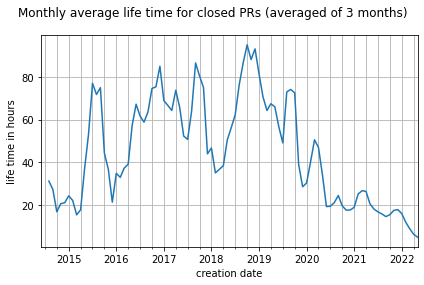

In [29]:
f, ax = plt.subplots()
(closed_prs['lifetime'].dt.total_seconds() / (24 * 3600)).resample('M').mean().rolling(3).mean().plot()
f.suptitle("Monthly average life time for closed PRs (averaged of 3 months)")
ax.set(xlabel="creation date", ylabel="life time in hours")
ax.grid(which='both')
tools.savefig(f, 'prs_monthly_lifetime')

What is the reason for this trend? Are we simply taking longer to review PRs? No, the time for PRs that are actually closed has been drastically reduced in recent years.

In [30]:
(closed_prs['lifetime'].dt.total_seconds() / (24 * 3600)).resample('D').mean()

createdAt
2014-06-10 00:00:00+00:00    100.287877
2014-06-11 00:00:00+00:00      7.807616
2014-06-12 00:00:00+00:00      2.566407
2014-06-13 00:00:00+00:00      6.474606
2014-06-14 00:00:00+00:00           NaN
                                ...    
2022-05-23 00:00:00+00:00      0.367905
2022-05-24 00:00:00+00:00           NaN
2022-05-25 00:00:00+00:00      0.661192
2022-05-26 00:00:00+00:00           NaN
2022-05-27 00:00:00+00:00      5.042523
Freq: D, Name: lifetime, Length: 2909, dtype: float64